In [80]:
import requests
import pandas as pd
import matplotlib.pyplot as plt

In [81]:
endpoint = 'https://data.nashville.gov/resource/fuaa-r5cm.json'

In [82]:
response = requests.get(endpoint)

In [83]:
response

<Response [200]>

1. Make an API request that returns the months where "fire" was searched in 2016. Which month had the most searches?

In [84]:
params = {
    "Year": "2016",
    "Query Text": "fire"
}

In [85]:
response = requests.get(endpoint, params = params)

In [86]:
res = response.json()
res

[{'month_name': 'January',
  'year': '2016',
  'query_count': '19',
  'query_text': 'fire'},
 {'month_name': 'February',
  'year': '2016',
  'query_count': '35',
  'query_text': 'fire'},
 {'month_name': 'March',
  'year': '2016',
  'query_count': '32',
  'query_text': 'fire'},
 {'month_name': 'April',
  'year': '2016',
  'query_count': '26',
  'query_text': 'fire'},
 {'month_name': 'May',
  'year': '2016',
  'query_count': '24',
  'query_text': 'fire'},
 {'month_name': 'June',
  'year': '2016',
  'query_count': '31',
  'query_text': 'fire'},
 {'month_name': 'July',
  'year': '2016',
  'query_count': '24',
  'query_text': 'fire'},
 {'month_name': 'August',
  'year': '2016',
  'query_count': '47',
  'query_text': 'fire'},
 {'month_name': 'September',
  'year': '2016',
  'query_count': '36',
  'query_text': 'fire'},
 {'month_name': 'October',
  'year': '2016',
  'query_count': '38',
  'query_text': 'fire'},
 {'month_name': 'November',
  'year': '2016',
  'query_count': '32',
  'query_text

In [87]:
query_fire = pd.DataFrame(res)
query_fire

,month_name,year,query_count,query_text
0,January,2016,19,fire
1,February,2016,35,fire
2,March,2016,32,fire
3,April,2016,26,fire
4,May,2016,24,fire
5,June,2016,31,fire
6,July,2016,24,fire
7,August,2016,47,fire
8,September,2016,36,fire
9,October,2016,38,fire


In [88]:
print(query_fire[query_fire['query_count'] == query_fire['query_count'].max()])

  month_name  year query_count query_text
7     August  2016          47       fire


2. Make an API request that returns all the times a query was run more than 100 times in a month. How many times did this occur? 

In [89]:
data = response.json()

In [106]:
params2 = {
    "$where": "query_count > 100",
    "$select": "query_text, query_count",
    "$limit": 50000
}

In [107]:
response = requests.get(endpoint, params=params2)

In [108]:
response

<Response [200]>

In [109]:
data = response.json()

In [110]:
count = len(data)

In [111]:
count

1262

3. Make another API request that returns all the times "codes" was searched more than 100 times in a month. How many times did this occur?

In [96]:
params3 = {
    "$where": "query_text = 'codes' AND query_count > 100",
    "$select": "query_text, query_count"
}

In [97]:
response = requests.get(endpoint, params=params3)

In [98]:
if response.status_code == 200:
    data = response.json()
    count = len(data)

In [99]:
count

56

4. Make an API request that returns the entire Top 500 Monthly Searches dataset. Make a chart that shows the number of times "maps" was searched in a month across the entire time frame.

In [120]:
params4 = {
    "$limit" : 50000
}

In [126]:
response = requests.get(endpoint, params=params4)
data = response.json()

In [127]:
for record in data:
    print(record.keys())
    break

dict_keys(['month_name', 'year', 'query_count', 'query_text'])


In [130]:
#iterate over datset to check query text
#count occurance of "maps" for each month 
#store counts in dictionary where the keys are the months and the values are the corresponding counts
#ensure query_count key exists in each record to avoid errors

search_counts = {}
for record in data:
    query_text = record["query_text"]
    month_name = record["month_name"]
    if "query_count" in record:
        query_count = int(record["query_count"])
        if query_text.lower() == "maps":
            if month_name in search_counts:
                search_counts[month_name] += query_count
            else:
                search_counts[month_name] = query_count

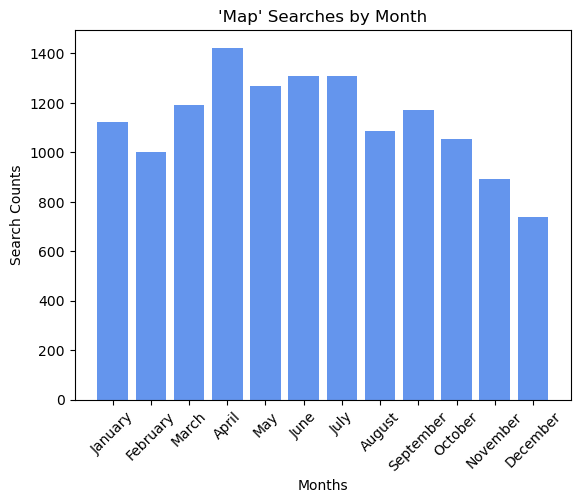

In [140]:
#extract months and counts fromm search_counts dictionary
#use matplotlib's bar function to create bar chart with x-axis = months, y-axis= search counts
#customize with labels, title, formatting
#display

months = list(search_counts.keys())
counts = list(search_counts.values())

plt.bar(months, counts, color='cornflowerblue')
plt.xlabel("Months")
plt.ylabel("Search Counts")
plt.title("'Map' Searches by Month")
plt.xticks(rotation=45)
plt.show()